1. About data

For this analysis, I've utilized 16 years of historical data spanning from January 1996 to late 2022 for the following stocks listed on the National Stock Exchange (NSE):
- HDFC Ltd.
- Sun Pharmaceutical Industries Ltd.
- Tata Consultancy Services Ltd.
- Jindal Steel & Power Ltd.
- Jubilant FoodWorks Ltd.

These selected stocks represent diverse sectors and market capitalizations, showcasing the advantages of this diversified approach in our analysis. To commence, we will conduct an individual investigation of the HDFC stock, followed by a comprehensive combined analysis. For this section, I obtained the historical data of HDFC stock in CSV format from Kaggle datasets. In the subsequent section, we will explore a convenient tool for directly retrieving stock prices from the web.

**2. Understanding data & general statistics**

Import necessary libraries —

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

Retrieve information from a CSV file and present the initial rows. —

In [ ]:
HDFC_df = pd.read_csv('HDFCBANK.NS.csv')
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


Given the extensive duration of our analysis, we can be less stringent about the precision of decimal places to consider.

In [ ]:
HDFC_df = HDFC_df.round(2)
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.03,3.03,2.92,2.98,2.42,350000.0
1,1996-01-02,2.98,3.02,2.95,2.98,2.41,412000.0


Now, let's ascertain the dimensions of the dataset.

In [ ]:
HDFC_df.shape

(6567, 7)

The HDFC dataset consists of 6567 rows and 7 columns. Subsequently, we'll examine if there are any null values within the dataset.

In [ ]:
HDFC_df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

Drop the null entries from the dataset.

In [ ]:
HDFC_df.dropna(inplace = True, axis = 0)

Now, let’s check the data type of each column —

In [ ]:
HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

As observed, the 'Date' column is currently not in the correct format. Pandas offers built-in tools for handling time-series data more efficiently. However, to leverage Pandas' date-related functionality, it's essential to ensure that the 'Date' column is of the 'datetime64(ns)' data type.

In [ ]:
HDFC_df['Date'] = pd.to_datetime(HDFC_df['Date'])
HDFC_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.03,3.03,2.92,2.98,2.42,350000.0
1,1996-01-02,2.98,3.02,2.95,2.98,2.41,412000.0


To calculate the overall time duration for which we are conducting this analysis.

In [ ]:
HDFC_df['Date'].max() - HDFC_df['Date'].min()

Timedelta('9517 days 00:00:00')

There are approximately 252 trading days in a year, which can be broken down as an average of 21 trading days per month or 63 trading days per quarter. Out of the total 365 days in a year, 104 days are weekends (Saturdays and Sundays) when the stock exchanges are closed.

Following that, we will employ Pandas' `describe()` function to obtain a high-level overview of the HDFC stock's performance over the past couple of months.

In [ ]:
HDFC_df.iloc[-120:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,120,120,120,120,120,120
mean,1547,1561,1533,1547,1547,6181428
std,60,60,58,58,58,2803513
min,1410,1435,1410,1422,1422,548404
25%,1504,1526,1496,1512,1512,4377808
50%,1545,1557,1532,1548,1548,5595623
75%,1583,1597,1569,1582,1582,7380857
max,1705,1725,1671,1688,1688,20981948


Over the previous 120 days, the HDFC stock exhibited an average closing price of approximately ₹1547. During this period, the stock traded below ₹1582 for about 75% of the time and reached its highest point at ₹1688. The maximum volume of shares traded on a single day amounted to 20,981,948, while the median quantity stood at 5,595,623.

**3. General variation in the stock price**

Prior to delving into further analysis, we will designate the 'Date' column as the dataframe's index, simplifying the process of creating plots.

In [ ]:
HDFC_df.index = HDFC_df['Date']

Let's now create a plot illustrating the adjusted closing price of the stock over the specified time frame to gain a broad overview of its performance during this period.

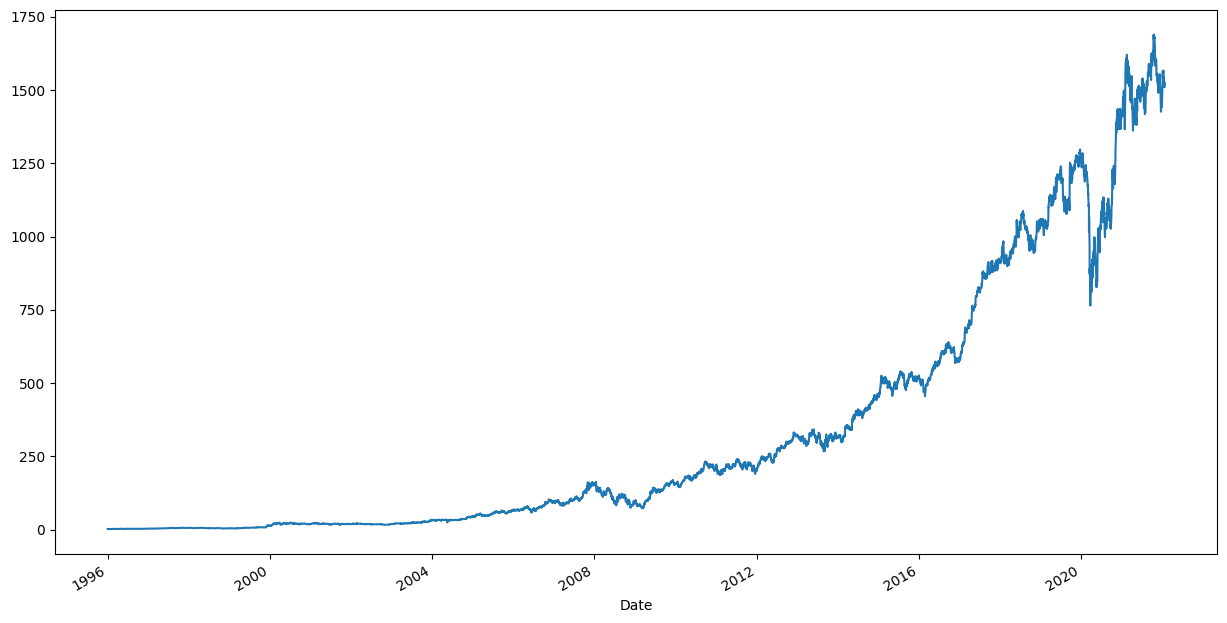

In [ ]:
HDFC_df['Adj Close'].plot(figsize = (15,8))
plt.show()

In the plot above, you may observe a significant drop in the stock price around September 2018. Beyond the "September effect," the overall decrease in HDFC's stock price can be linked to the intensifying trade tensions between the United States and China, which had a spillover impact on the Indian financial markets.
The HDFC stock experienced a sharp decline in early 2020, primarily driven by the global COVID-19 pandemic. Investor panic and uncertainty led to a rapid sell-off, impacting not only HDFC but also the broader market. The economic slowdown, supply chain disruptions, and interest rate cuts weighed on the company's profitability. However, as governments implemented stimulus measures and vaccine development progressed, market sentiment improved. HDFC's recovery was supported by lower interest rates, increased investor confidence, and a gradual return to economic stability. The stock's rebound reflected the resilience of the financial sector and its ability to adapt to challenging circumstances.

**4. Day-to-day percentage change(Daily returns)**

As a result, we will incorporate a fresh column called 'Day_Perc_Change,' which will represent the daily price returns of the stock. This can be achieved using the built-in `pct_change()` function in Python.

In [ ]:
HDFC_df['Day_Perc_Change'] = HDFC_df['Adj Close'].pct_change()*100
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
1996-01-01,1996-01-01,3.03,3.03,2.92,2.98,2.42,350000.0,NaN
1996-01-02,1996-01-02,2.98,3.02,2.95,2.98,2.41,412000.0,-0.413223
1996-01-03,1996-01-03,2.98,3.00,2.95,2.98,2.42,284000.0,0.414938
1996-01-04,1996-01-04,2.98,2.98,2.94,2.96,2.41,282000.0,-0.413223
1996-01-05,1996-01-05,2.96,2.98,2.95,2.96,2.40,189000.0,-0.414938


You’ll notice that the first value in the ‘Day_Perc_Change’ column is NaN. We’ll drop this row.

In [ ]:
HDFC_df.dropna(axis = 0, inplace = True)

Representing daily returns in form of a plot —

<Axes: xlabel='Date'>

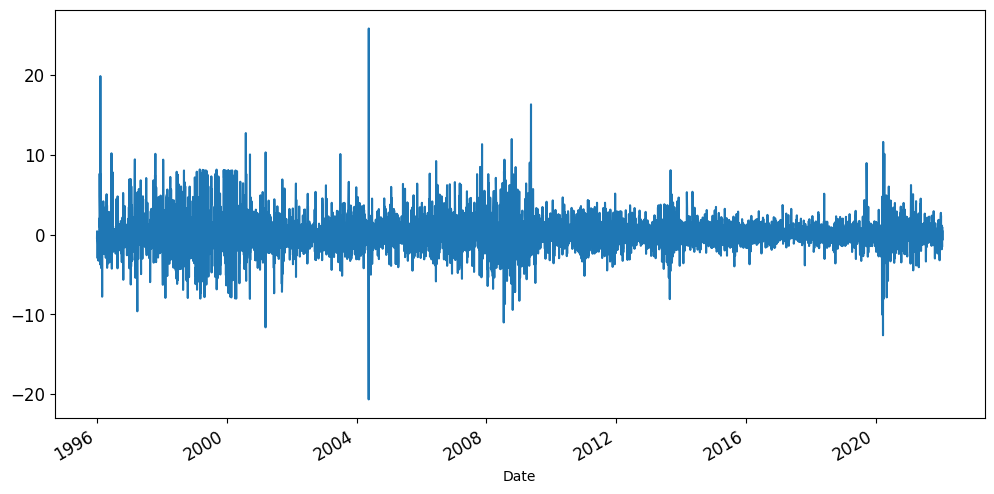

In [ ]:
HDFC_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

It can be observed that for most of the days, the returns are between -4% to 4% with few spikes in between crossing 10% mark on both the sides.

Plotting daily returns distribution histogram —

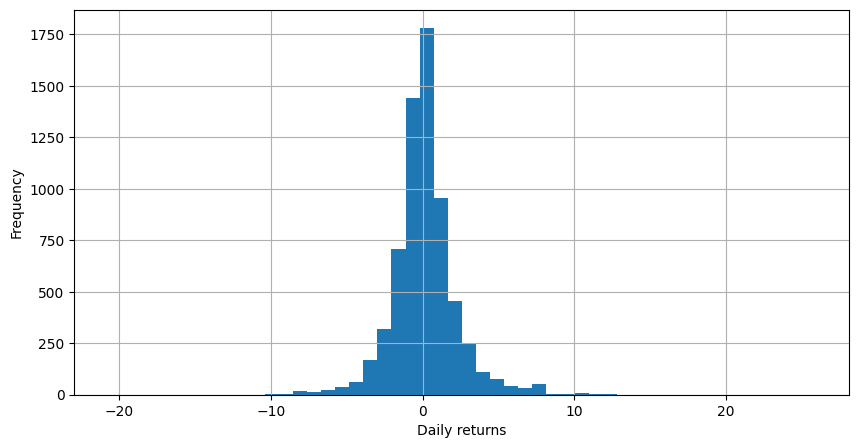

count    6559.000000
mean        0.121378
std         2.158486
min       -20.634921
25%        -0.896307
50%         0.000000
75%         1.003428
max        25.800000
Name: Day_Perc_Change, dtype: float64

In [ ]:
HDFC_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5))
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
HDFC_df.Day_Perc_Change.describe()

The histogram of daily returns is symmetrically distributed around zero. Over the past 16 years, the mean daily return has been approximately 0.121, with most days experiencing returns of less than 1%. This suggests that HDFC stock exhibited relatively low volatility during this period. The highest positive daily return observed was 25.8%, while the most significant negative daily return was 20.6%. Evidently, there were no instances of extreme "bull runs" or "bear drops" in the dataset during this time frame.

**5. Trend Analysis**

Next, we will introduce a new column named 'Trend,' and its values will be derived from the day-to-day percentage change that we computed earlier. The 'Trend' is established according to the following relationship:

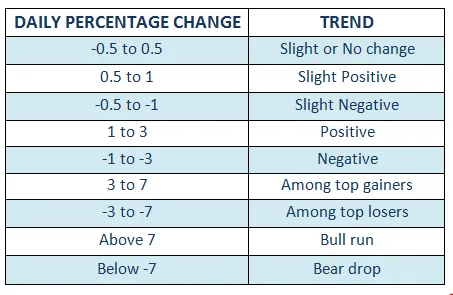

In [ ]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
HDFC_df['Trend']= np.zeros(HDFC_df['Day_Perc_Change'].count())
HDFC_df['Trend']= HDFC_df['Day_Perc_Change'].apply(lambda x:trend(x))
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
1996-01-02,1996-01-02,2.98,3.02,2.95,2.98,2.41,412000.0,-0.413223,Slight or No change
1996-01-03,1996-01-03,2.98,3.00,2.95,2.98,2.42,284000.0,0.414938,Slight or No change
1996-01-04,1996-01-04,2.98,2.98,2.94,2.96,2.41,282000.0,-0.413223,Slight or No change
1996-01-05,1996-01-05,2.96,2.98,2.95,2.96,2.40,189000.0,-0.414938,Slight or No change
1996-01-08,1996-01-08,2.96,2.95,2.91,2.92,2.37,237000.0,-1.250000,Negative


Our goal is to analyze the stock's historical trends over past years. This can be depicted visually as a pie chart, where each sector represents the proportion of days corresponding to different trend categories. We will create a pie chart for the 'Trend' column to illustrate the relative frequency of each trend category.

To achieve this, we will utilize the `groupby()` function, grouping together all days with the same trend into a single category before generating the pie chart.

Visualizing Trend Frequency with Pie-Chart —

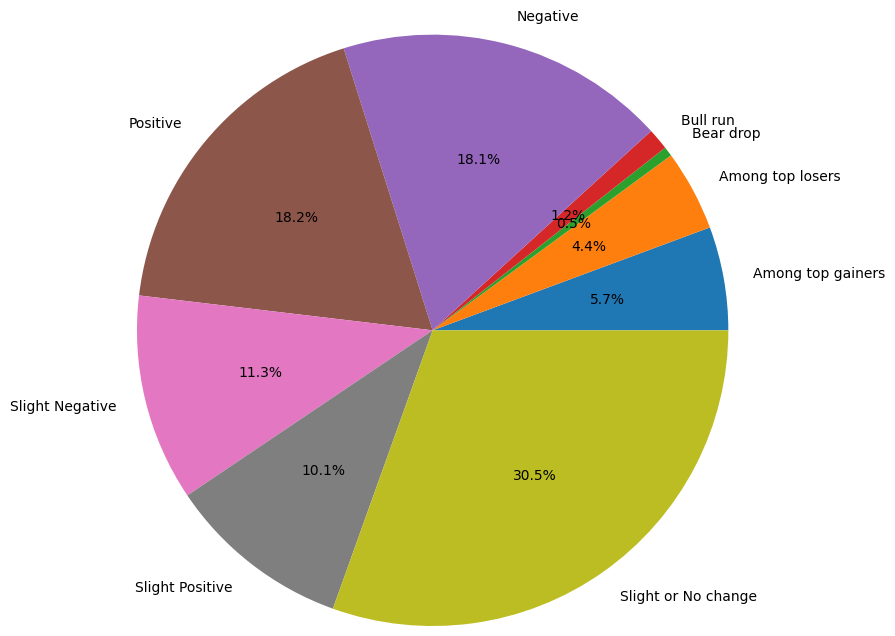

In [ ]:
HDFC_pie_data = HDFC_df.groupby('Trend')
pie_label = sorted([i for i in HDFC_df.loc[:, 'Trend'].unique()])
plt.pie(HDFC_pie_data['Trend'].count(), labels = pie_label, radius = 2, autopct='%1.1f%%')

plt.show()

HDFC stock was categorized as one of the top gainers for approximately 5.7% of the time, while it fell under the category of top losers for 4.4% of the time. Moreover, during about 18.2% of the observed period, the stock exhibited positive daily performance. Conversely, a significant portion of the time (around 30.5%) was characterized by minimal price fluctuations. These findings align with the patterns identified in the daily return histogram discussed in the previous section.

6. Daily Returns and Volume

<Axes: xlabel='Date'>

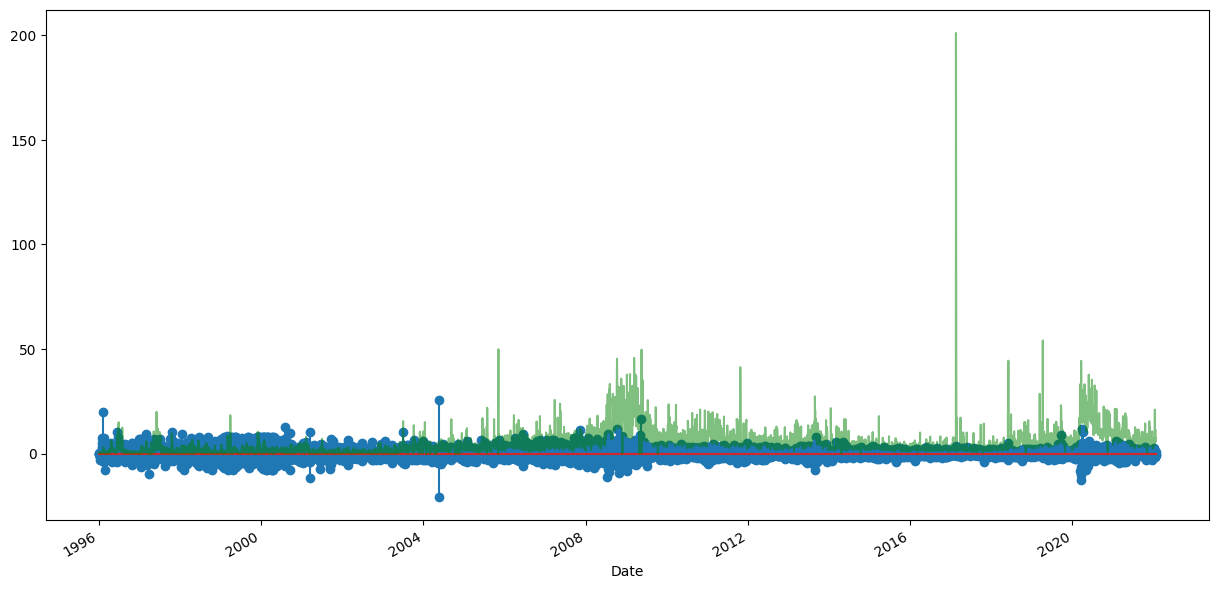

In [ ]:
plt.stem(HDFC_df['Date'], HDFC_df['Day_Perc_Change'])
(HDFC_df['Volume']/1000000).plot(figsize = (15, 7.5),
                                 color = 'green',
                                 alpha = 0.5)

(* Daily volume of trade has been reduced in scale to match with the daily return scale)

Upon comparing the daily trade volume (in green) with the daily returns (in blue), a notable pattern emerged: whenever there was a substantial increase in the volume of shares traded, it corresponded to a significant rise or fall in the stock price, resulting in heightened returns. Consequently, if an unusually high volume of trading occurs on a given day, it signals the potential for significant market movements in either direction. The volume of shares traded, when coupled with price fluctuations, generally serves as an indicator of traders' and investors' confidence in a particular company.

7. Correlation Analysis Of Stocks with Pair plot and Joint plots


In the pursuit of portfolio diversification, it is essential to minimize the correlation between individual stocks. In mathematical terms, the Pearson's correlation coefficient (referred to as Pearson's R value) between any two stocks should be near 0. The underlying concept is straightforward: if your portfolio consists of highly correlated stocks, a decline in one stock's value may trigger losses in others, potentially jeopardizing your entire investment.

I've chosen the mentioned stocks for conducting the correlation analysis. These stocks belong to diverse industry segments and have varying market capitalizations. However, you have the flexibility to select stocks that align with your preferences. The analysis process remains unchanged regardless of your choice of stocks.


In the previous section, we utilized a pre-downloaded CSV file for our analysis. In this section, we will leverage Pandas to retrieve web data, allowing us to extract stock prices directly from online sources.

In [ ]:
import yfinance as yf

# Download data for AAPL (Apple Inc.)
combined_df = yf.download(['HDFCBANK.NS', 'JINDALSTEL.NS', 'JUBLFOOD.NS', 'SUNPHARMA.NS', 'TCS.NS'],
                          start="2013-01-01", end="2022-12-31")['Adj Close']

# Print the first 5 rows of the data
combined_df.head()

[*********************100%%**********************]  5 of 5 completed


,HDFCBANK.NS,JINDALSTEL.NS,JUBLFOOD.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,
2013-01-01,315.591339,451.156799,128.531464,344.860413,506.066528
2013-01-02,316.905334,456.147369,129.765274,345.513275,505.726196
2013-01-03,315.061096,456.343109,131.253677,342.225555,512.651672
2013-01-04,313.216858,447.976562,129.305054,342.831848,520.097534
2013-01-07,308.076141,448.563629,129.035767,347.028870,518.356323


Drop null values and display first few rows

In [ ]:
# drop null values
combined_df.dropna(inplace = True, axis = 0)
# display first few rows
combined_df.head()

,HDFCBANK.NS,JINDALSTEL.NS,JUBLFOOD.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,
2013-01-01,315.591339,451.156799,128.531464,344.860413,506.066528
2013-01-02,316.905334,456.147369,129.765274,345.513275,505.726196
2013-01-03,315.061096,456.343109,131.253677,342.225555,512.651672
2013-01-04,313.216858,447.976562,129.305054,342.831848,520.097534
2013-01-07,308.076141,448.563629,129.035767,347.028870,518.356323


Next we’ll analyse the correlation between the different stocks in a pair-wise fashion with Seaborn pairplot.

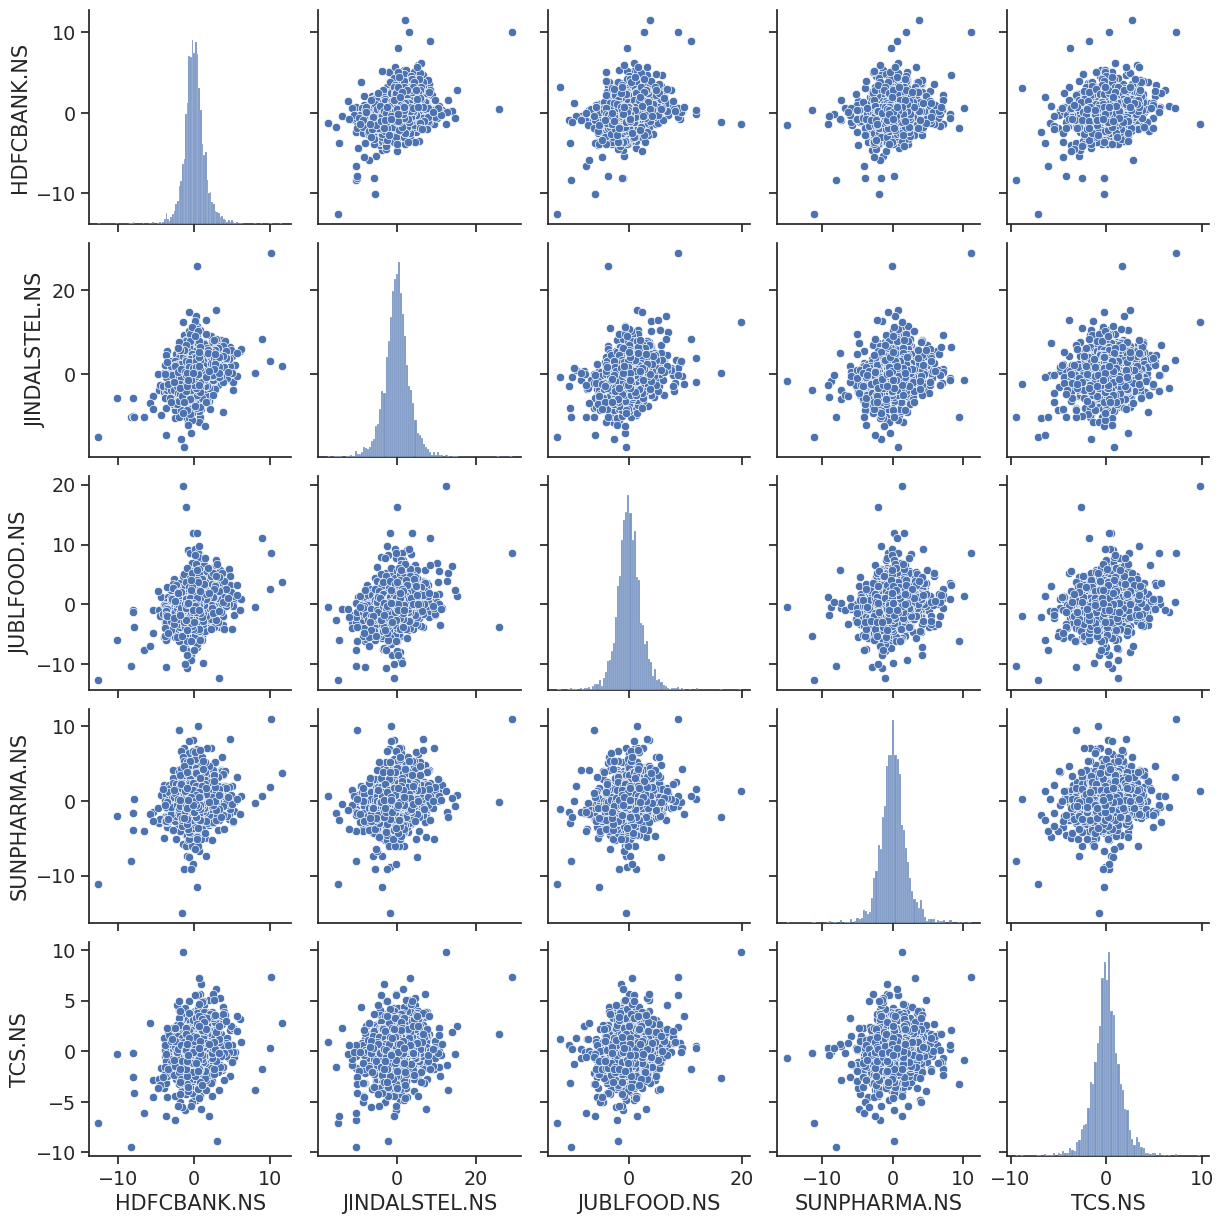

In [ ]:
# store daily returns of all above stocks in a new dataframe
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot
import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

Please be aware that the correlation analysis is conducted using the daily percentage change (daily returns) of the stock price, not the actual stock price values.

If you examine closely, the plots in the lower triangular region are identical to those in the upper triangular region, with the axes swapped. Hence, analyzing either set of plots provides the same information. The diagonal elements represent histograms, similar to the one displayed earlier for HDFC stock.

Takeaway:

HDFC, Jindal Steel, Jubilant Foods, Sun Pharma, and TCS stocks can be considered for inclusion in a portfolio because there is no notable correlation between any pair of these stocks.

Drawback:

While pair plots offer a visual representation of potential correlations among a group of stocks, they lack detailed quantitative information such as Pearson's R value or the null-hypothesis p-value to measure these correlations accurately. This is where Seaborn's jointplot comes into play.

While pair plots provide a visual overview of correlations, a Seaborn jointplot supplies precise data like Pearson's R value (Pearson's correlation coefficient) for each stock pair. Pearson's R value ranges from -1 to 1, with negative values indicating a negative linear relationship, positive values indicating a positive relationship, and values closer to 1 or -1 suggesting strong correlation, while values near 0 suggest weak correlation.

In addition to Pearson's R value, the joint plot displays histograms along the edges and the corresponding null hypothesis p-value.

Here's an example of joint plots showcasing correlations between Sun Pharma and Jindal Steel, as well as Jindal Steel and HDFC BANK stocks.

ρ = 0.245, p = 0.000


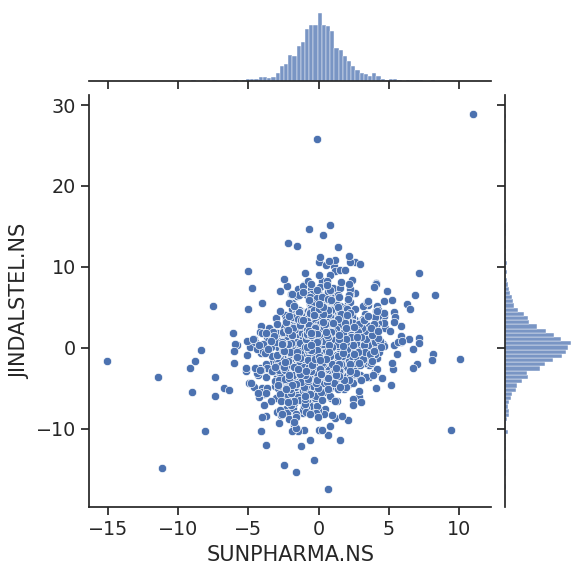

ρ = 0.315, p = 0.000


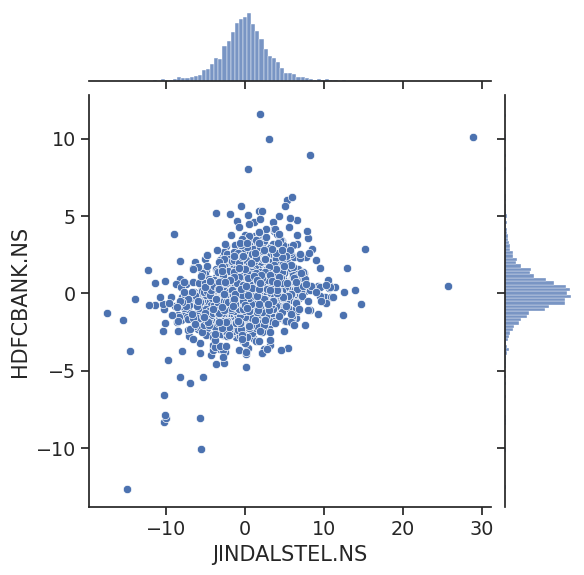

In [ ]:
from scipy.stats import stats

sns.jointplot(pct_chg_df, x = 'SUNPHARMA.NS', y = 'JINDALSTEL.NS', kind = 'scatter')
r, p = stats.pearsonr(pct_chg_df['SUNPHARMA.NS'], pct_chg_df['JINDALSTEL.NS'])
print(f'ρ = {r:.3f}, p = {p:.3f}')
plt.show()

sns.jointplot(pct_chg_df, x = 'JINDALSTEL.NS', y = 'HDFCBANK.NS', kind = 'scatter')
r, p = stats.pearsonr(pct_chg_df['JINDALSTEL.NS'], pct_chg_df['HDFCBANK.NS'])
print(f'ρ = {r:.3f}, p = {p:.3f}')
plt.show()


Takeaways:
1. The Pearson's R value between Jindal Steel and Sun Pharma is measured at 0.245, signifying a very low correlation, indicating weak association.
2. Likewise, a Pearson's R value of 0.315 is calculated for HDFC versus Jindal Steel, revealing a weak correlation between HDFC and Jindal Steel stocks.


The numerical values obtained from the joint plots serve as quantitative confirmation of the insights we initially gleaned from the visual analysis of the pair plots.

However, it's crucial to note that while correlation is a significant factor, it's not the sole determinant when deciding which stocks to include or exclude from a portfolio. Numerous other factors come into play. Seeking advice from experts and making well-informed decisions is advisable.

**9. Volatility analysis**

Volatility stands as a cornerstone in financial markets, signifying a stock's propensity for significant value fluctuations within a brief timeframe. Conversely, lower volatility suggests a stock's value tends to remain relatively stable over an extended period. These oscillations stem from various factors, encompassing supply and demand dynamics, market sentiment, corporate developments, as well as emotions like greed and fear. Mathematically, volatility is quantified using the statistical metric known as 'standard deviation,' which gauges how much an asset deviates from its average value.

Having already computed the daily returns of HDFC stock and several others, our next step involves calculating the 7-day rolling mean, also referred to as the moving average, of these daily returns. Subsequently, we'll determine the standard deviation (the square root of variance) and visualize the results. Notably, this process is expedited by Pandas, as its 'rolling()' function and 'std()' function streamline the calculations in a single line, sparing us from manual computation.

<Axes: xlabel='Date'>

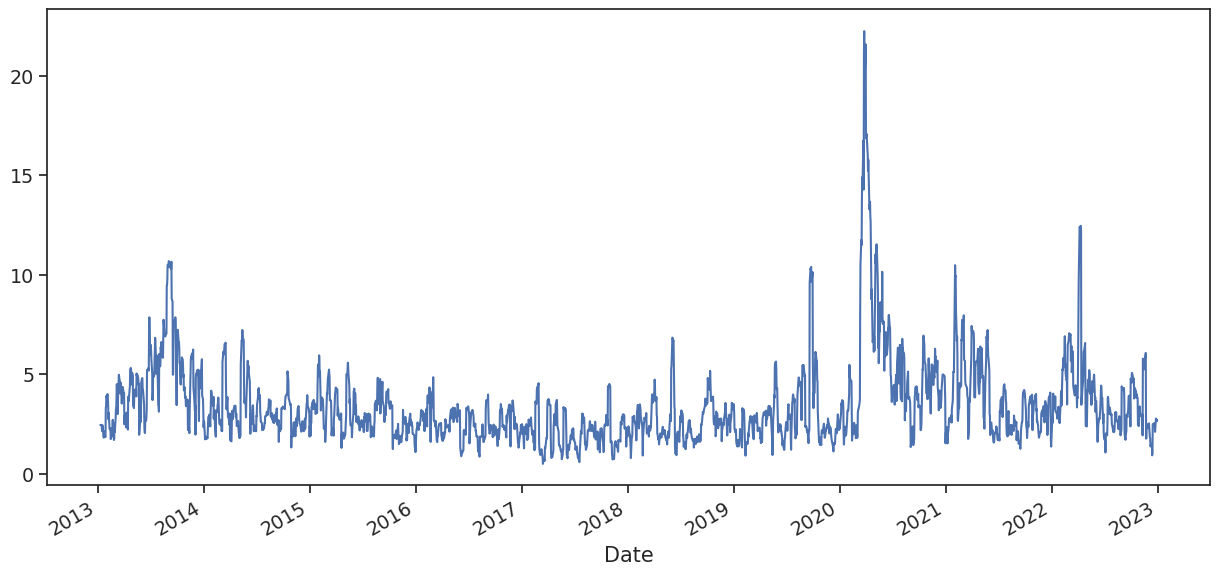

In [ ]:
HDFC_vol = pct_chg_df['HDFCBANK.NS'].rolling(7).std()*np.sqrt(7)
HDFC_vol.plot(figsize = (15, 7))

Next, we will conduct a comparative analysis of the volatility of HDFC stock in relation to SunPharma, Jindal Steel, Jubilant Foodworks, and TCS stocks. Similar to the previous process, we will calculate the 7-day rolling mean and standard deviation, all accomplished effortlessly with a single line of code. Pandas truly simplifies our workflow!

<Axes: xlabel='Date'>

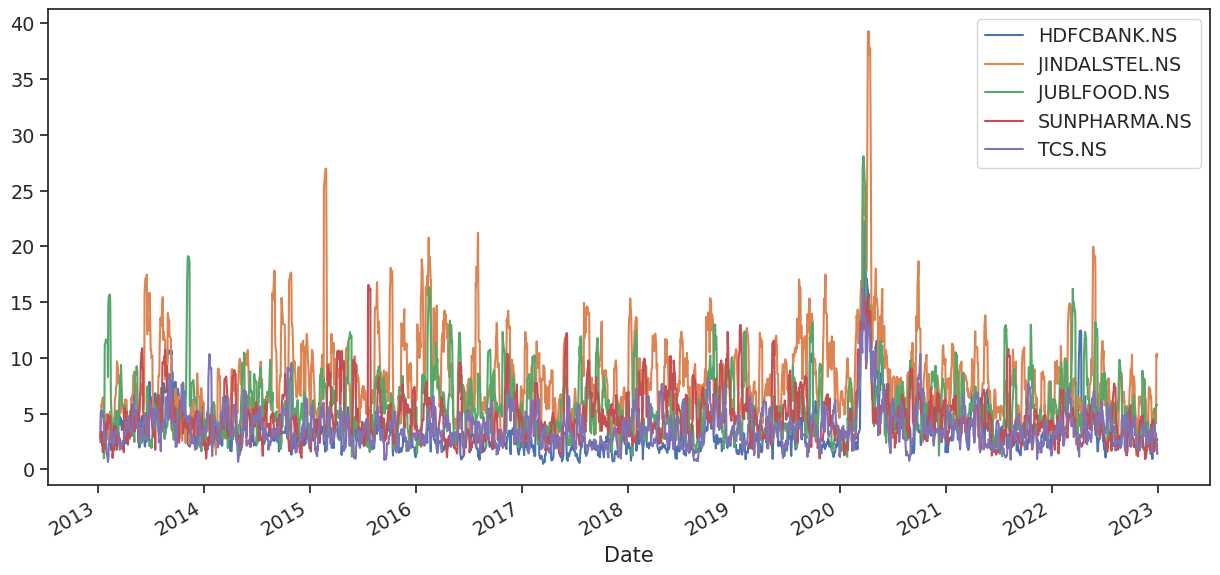

In [ ]:
volatility = pct_chg_df[['HDFCBANK.NS', 'JINDALSTEL.NS', 'JUBLFOOD.NS', 'SUNPHARMA.NS', 'TCS.NS']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (15, 7))

It's noticeable that Jindal Steel and Jubilant Foodworks exhibit greater volatility than HDFC and TCS, with HDFC displaying the lowest volatility, and Sun Pharma falls in between. This pattern aligns with expectations, as Jindal Steel, Jubilant Foodworks, and Sun Pharma are mid-cap stocks, which typically carry higher volatility, while HDFC and TCS are large-cap stocks, known for their lower volatility. Mid-cap stocks tend to have higher volatility than large-cap stocks due to their smaller market capitalization, lower liquidity, and greater sensitivity to company-specific news and risks. Investors often perceive mid-caps as riskier, and their price fluctuations are more pronounced. While this volatility offers potential for higher returns, it requires careful consideration in portfolio strategies.

Numerous traders and investors actively pursue investments with elevated volatility to maximize potential profits. When a stock remains stagnant, it not only exhibits low volatility but also offers limited profit potential. Conversely, securities with exceptionally high volatility present significant profit opportunities, yet they also entail substantial risks.

Endnotes

There is no foolproof strategy that can ensure guaranteed profits on investments. In reality, traders consider various factors before making investment decisions. While we can enhance our prospects by employing appropriate strategies and techniques, I am eager to introduce and demonstrate some of these strategies using Python in my upcoming articles.

